<a href="https://colab.research.google.com/github/DeveloperAkram/Colab-Notebooks/blob/master/Project_3_Gold_Price_Prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame

gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# read first 5 data rows

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# total no of rows and columns

gold_data.shape

(2290, 6)

In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# getting some basic informations about the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking no of missing values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr()

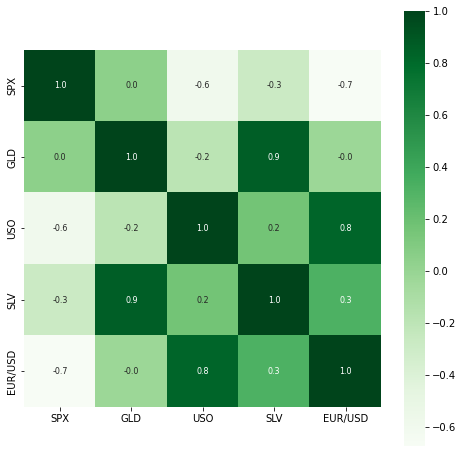

In [33]:
# constructing a heatmap to understand the correlation

plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot=True, annot_kws = {'size':8}, cmap='Greens')


In [15]:
# correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


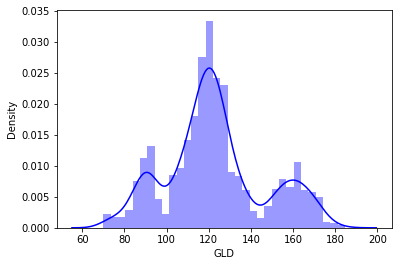

In [30]:
# checking the distribution of the GLD Price

sns.distplot(gold_data['GLD'], color='blue')

Splitting the Features and Target

In [19]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

In [20]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


Splitting into Training data and Test data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

Model Training

Random Forest Algorithm

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
# training the model

regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model Evaluation

In [24]:
# prediction on Test data

test_data_predict = regressor.predict(X_test)

In [25]:
print(test_data_predict)

[168.51419951  81.75799999 115.9298001  127.75960081 120.957901
 154.73239773 149.78829847 126.19450028 117.49249884 126.09220061
 116.82270093 172.049601   141.36969913 167.9278988  115.23069963
 117.61210029 138.1579033  169.80610069 160.03550314 159.68439931
 155.29720057 125.48820007 175.98089978 157.17860385 125.10650038
  93.64329967  77.61200002 120.4495001  119.0859989  167.56119936
  88.12580052 125.22140025  91.12430071 117.66639996 121.13689902
 137.43140156 115.41420122 115.25170074 147.06289935 107.54800092
 104.3793024   87.342198   126.46930043 118.04649987 153.84019835
 119.54200021 108.38469985 107.98239814  93.12010033 126.97459789
  75.33180016 113.84159918 121.32090022 111.1948993  118.80199882
 120.42559895 158.00140068 167.19290113 146.72239684  85.94619874
  94.28810003  86.89669914  90.53930056 118.98610049 126.41270087
 127.63979986 170.45310009 122.31729932 117.24519923  98.91010082
 168.54650015 142.8644979  131.8000014  121.24470201 121.18059948
 119.8846007

In [26]:
# R squared error

error_sore = metrics.r2_score(y_test, test_data_predict)
print("R squared error : ", error_sore)

R squared error :  0.9888602324793289


Compare the Actual values and Predicted values in a plot

In [27]:
y_test = list(y_test)

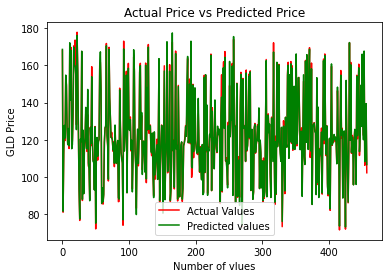

In [29]:
plt.plot(y_test, color="red", label="Actual Values")
plt.plot(test_data_predict, color="green", label="Predicted values")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of vlues")
plt.ylabel("GLD Price")
plt.legend()
plt.show()